In [2]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None) 
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
ins_file = 'data'
ext = '.csv'

data = pd.read_csv(ins_file+ext)

In [4]:
# Data Wrangling
data.head(20)
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [6]:
data['MonthlyCharges'].std()

30.085973884049906

In [7]:
data['MonthlyCharges'].var()

905.165824551733

In [8]:
data['MonthlyCharges'].mean()

64.7982081911263

In [9]:
print(data['gender'].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64


In [10]:
print(data.describe())

       SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count    7032.000000 7032.000000     7032.000000   7032.000000
mean        0.286832   32.421786       64.798208   2283.300441
std         0.452314   24.545260       30.085974   2266.771362
min         0.000000    1.000000       18.250000     18.800000
25%         0.000000    9.000000       35.587500    401.450000
50%         0.000000   29.000000       70.350000   1397.475000
75%         1.000000   55.000000       89.862500   3794.737500
max         1.000000   72.000000      118.750000   8684.800000


In [11]:
print(data.groupby('gender').mean())

        SeniorCitizen    tenure  MonthlyCharges  TotalCharges
gender                                                       
Female       0.289980 32.290841       65.216652   2283.190985
Male         0.283742 32.550296       64.387546   2283.407861


In [12]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- No Null Values
- Data Set is imbalanced to predict Churn. 5163 No vs 1869 Yes

In [13]:
# Categorically Enconding each column with numbers to analyse the best features with a Heat Map. Also allows for better 
# accuracy in Tree Classifiers.
encoder = OrdinalEncoder()

data["gender_code"] = encoder.fit_transform(data.gender.values.reshape(-1, 1)).astype('int64')
data["Partner_code"] = encoder.fit_transform(data.Partner.values.reshape(-1, 1)).astype('int64')
data["Dependents_code"] = encoder.fit_transform(data.Dependents.values.reshape(-1, 1)).astype('int64')
data["PhoneService_code"] = encoder.fit_transform(data.PhoneService.values.reshape(-1, 1)).astype('int64')
data["MultipleLines_code"] = encoder.fit_transform(data.MultipleLines.values.reshape(-1, 1)).astype('int64')
data["InternetService_code"] = encoder.fit_transform(data.InternetService.values.reshape(-1, 1)).astype('int64')
data["OnlineSecurity_code"] = encoder.fit_transform(data.OnlineSecurity.values.reshape(-1, 1)).astype('int64')
data["OnlineBackup_code"] = encoder.fit_transform(data.OnlineBackup.values.reshape(-1, 1)).astype('int64')
data["DeviceProtection_code"] = encoder.fit_transform(data.DeviceProtection.values.reshape(-1, 1)).astype('int64')
data["TechSupport_code"] = encoder.fit_transform(data.TechSupport.values.reshape(-1, 1)).astype('int64')
data["StreamingTV_code"] = encoder.fit_transform(data.StreamingTV.values.reshape(-1, 1)).astype('int64')
data["StreamingMovies_code"] = encoder.fit_transform(data.StreamingMovies.values.reshape(-1, 1)).astype('int64')
data["Contract_code"] = encoder.fit_transform(data.Contract.values.reshape(-1, 1)).astype('int64')
data["PaperlessBilling_code"] = encoder.fit_transform(data.PaperlessBilling.values.reshape(-1, 1)).astype('int64')
data["PaymentMethod_code"] = encoder.fit_transform(data.PaymentMethod.values.reshape(-1, 1)).astype('int64')
data["Churn_code"] = encoder.fit_transform(data.Churn.values.reshape(-1, 1)).astype('int64')


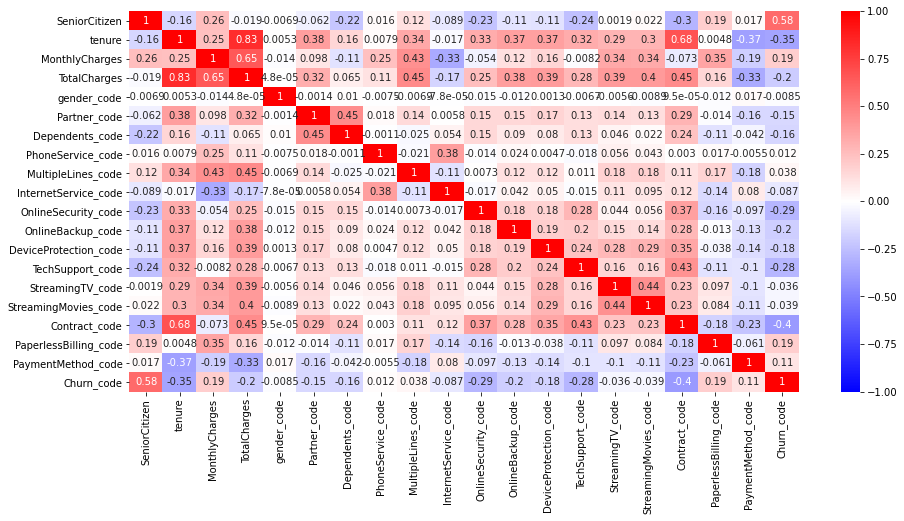

In [14]:
# Make a heatmap on the correlations between variables in the hotel data:
data_correlations = data.corr()
data_correlations
plt.figure(figsize=(15,7))
fig = sns.heatmap(data_correlations, vmin = -1, vmax = 1, cmap = 'bwr', annot=True)
fig.figure.savefig("output.png")

- It can be seen from the colourramp that Churn has a correlation with the following features
    - SeniorCitizen
    - tenure
    - MonthlyCharges
    - TotalCharges
    - Partner
    - Dependents
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - Contract
    - PaperlessBilling
    - PaymentMethod

In [15]:
# Features columns chosen for prediction.
feature_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Partner_code','Dependents_code','OnlineSecurity_code',
               'OnlineBackup_code', 'DeviceProtection_code','TechSupport_code','Contract_code','PaperlessBilling_code','PaymentMethod_code']

# Assigning Feature columns to X and y for Test Train Split
X = data[feature_cols]
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)
# 'min_samples_leaf': list(range(10, 100,10))
# 'max_depth': list(range(10, 100,10))
# 'splitter' : ['best', 'random']
# 'criterion': ['gini', 'entropy']


# Grid Search CV with various Hyperparameters to determine best Model.
params = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': list(range(10, 100,10)), 
          'max_depth': list(range(10, 100,10)),'splitter' : ['best', 'random']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       random_state=42)


In [18]:
best_model_task1 = grid_search_cv.best_estimator_

y_pred = best_model_task1.predict(X_test)

In [19]:
best_model_task1.classes_

array(['No', 'Yes'], dtype=object)

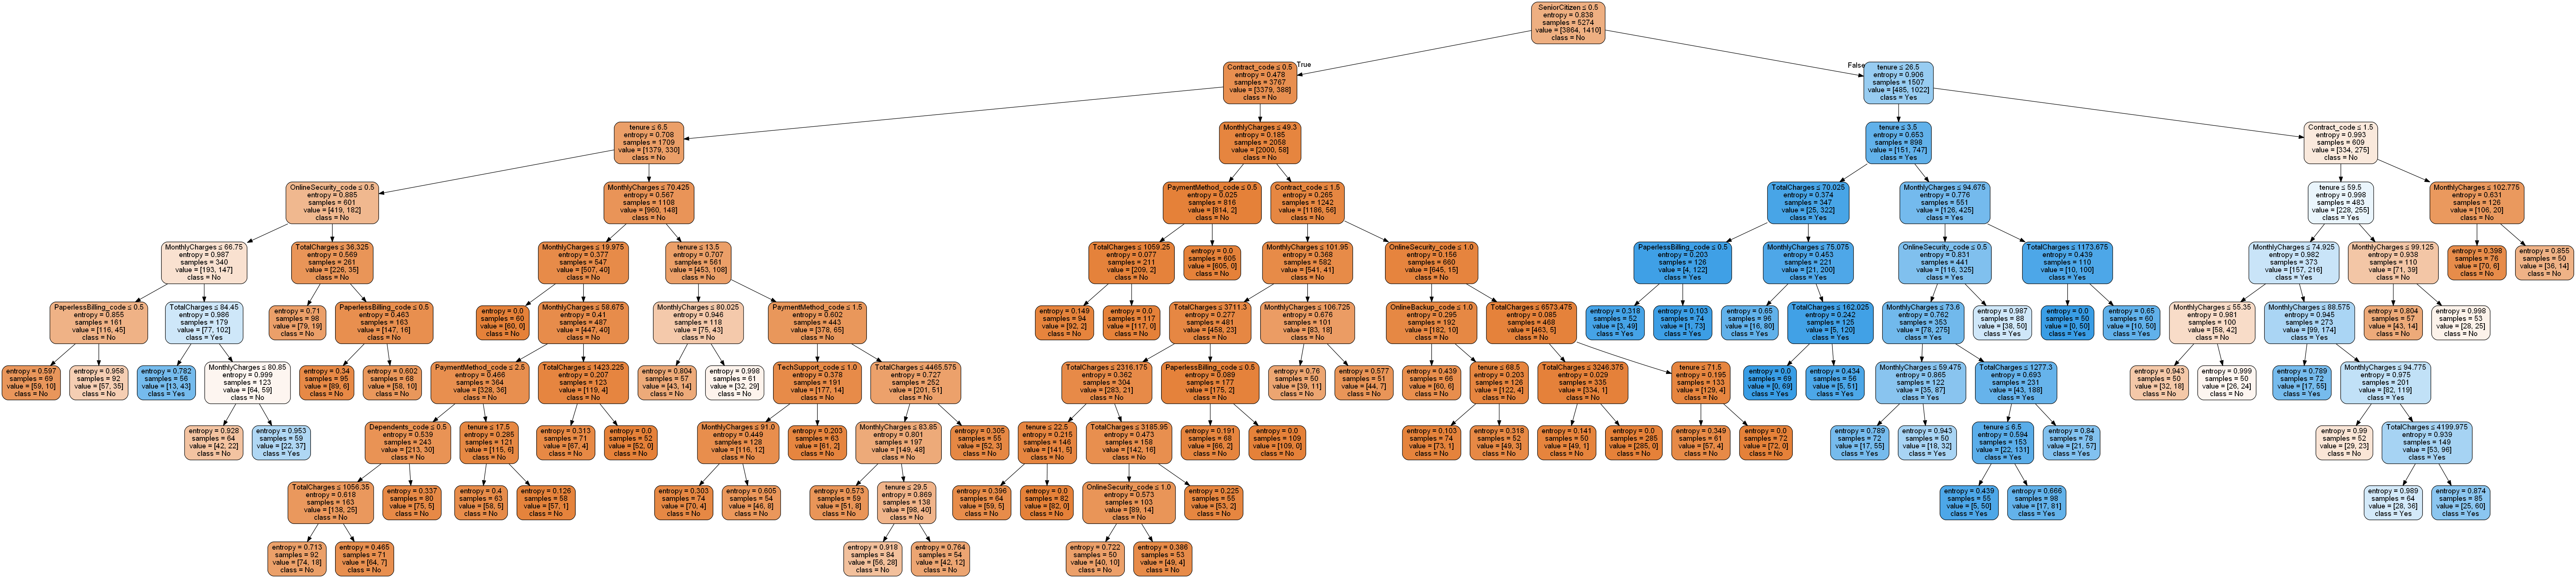

In [20]:
dot_data = StringIO()

export_graphviz(best_model_task1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names = best_model_task1.classes_)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
# from sklearn import tree
from sklearn import tree
tree.export_graphviz(best_model_task1, out_file='final_Tree.dot', feature_names = X.columns, class_names = best_model_task1.classes_) #produces dot file
dotfile = StringIO()
tree.export_graphviz(best_model_task1, out_file=dotfile)


# # pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")
# # https://onlineconvertfree.com/complete/dot-png/


- Looks like the feature columns are massive.
- Perhaps some tweaking
- Check accuracy

In [28]:
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [29]:
## https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

#accuracy
ac = (tp+tn)/(tn+tp+fp+fn)
#Misclassification Rate
mc = (fp+fn)/(tn+tp+fp+fn)
#True Positive Rate:
tpr = tp/(tp+fn)
#False Positive Rate:
fpr = fp/(fp+tn)
#True Negative Rate: 
tnr = tn/(fp+tn)
#Precision: 
pre = tp/(fp+tp)
#Prevalence: 
prev = (fn+tp)/(tn+tp+fp+fn)

In [30]:
print("Accuracy is " + str(ac*100) + "%")
print("Misclassification Rate is " + str(mc*100) + "%")
print("True Positive Rate is " + str(tpr*100) + "%")
print("False Positive Rate is " + str(fpr*100) + "%")
print("True Negative Rate " + str(tnr*100) + "%")
print("Precision is " + str(pre*100) + "%")
print("Prevalence is " + str(prev*100) + "%")

Accuracy is 85.3811149032992%
Misclassification Rate is 14.618885096700796%
True Positive Rate is 67.53812636165577%
False Positive Rate is 8.314087759815243%
True Negative Rate 91.68591224018475%
Precision is 74.16267942583733%
Prevalence is 26.109215017064848%


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.89      0.92      0.90      1299
         Yes       0.74      0.68      0.71       459

    accuracy                           0.85      1758
   macro avg       0.82      0.80      0.80      1758
weighted avg       0.85      0.85      0.85      1758



In [32]:
print(confusion_matrix(y_test, y_pred))

[[1191  108]
 [ 149  310]]


In [33]:
tp

310